# MLDM Group Assignment
### Members: Brigitte Aznar, Daniel Kostic and Stefan Vujovic

Data explanation:

survival        Survival
                (0 = No; 1 = Yes)
                
pclass          Passenger Class
                (1 = 1st; 2 = 2nd; 3 = 3rd)
                
name            Name

sex             Sex

age             Age

sibsp           Number of Siblings/Spouses Aboard

parch           Number of Parents/Children Aboard

ticket          Ticket Number

fare            Passenger Fare

cabin           Cabin

embarked        Port of Embarkation
                (C = Cherbourg; Q = Queenstown; S = Southampton)


## Task 1: Preprocessing and data analysis

In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import numpy as np
df = pd.read_csv('data.csv', index_col=0)

In [2]:
def makeClass(x):
    if x==1: return "firstClass"
    elif x==2: return "secondClass"
    else: return "thirdClass"
df['pclass'] = df.pclass.apply(lambda x: makeClass(x))
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,1,firstClass,female,29.0000,0,0,211.3375,S
1,1,firstClass,male,0.9167,1,2,151.5500,S
2,0,firstClass,female,2.0000,1,2,151.5500,S
3,0,firstClass,male,30.0000,1,2,151.5500,S
4,0,firstClass,female,25.0000,1,2,151.5500,S


In [3]:
import matplotlib.pylab as plt
def proportion_df(discrete_val):
    by_var = df.groupby([discrete_val,'survived'])
    freq_table = by_var.size()
    freq_table = freq_table.unstack()
    freq_table = freq_table.div(freq_table.sum(1), axis=0)
    return freq_table

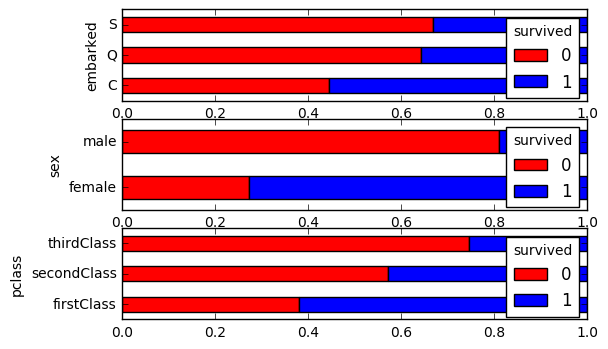

In [4]:
value_list = ['embarked','sex','pclass']
canvas, axes1 = plt.subplots(len(value_list),1)
for val in value_list:
    freq_table = proportion_df(val)
    colorsheme = ['red','blue']
    freq_table.plot(kind='barh', stacked=True, ax=axes1[value_list.index(val)], color=colorsheme)
plt.show()

Looking at these plots we can see that it is much more likely for a female to survive. Furthermore,
we can see that the passanger class has an impact on survival, the lower the class, the lower probability of survival.
The people who embark at Cherbourg have most chances of survival, much better than people from Queenstown and Southampton. 

In [5]:
by_var = df.groupby(["sex",'pclass','embarked','survived'])
freq_table = by_var.size()
freq_table = freq_table.unstack()
freq_table = freq_table.div(freq_table.sum(1), axis=0)

In [6]:
classes = ['firstClass','secondClass','thirdClass']
def plot_by_sex_and_class(df,sex,class_list):
    sex = freq_table.loc[sex]
    canvas, axes1 = plt.subplots(len(class_list),1)
    for c in class_list:
        tbl = sex.loc[c]
        colorsheme = ['red','blue']
        tbl.plot(kind='barh', stacked=True, ax=axes1[class_list.index(c)], color=colorsheme, title=str(c))
    canvas.tight_layout()   
    plt.show()

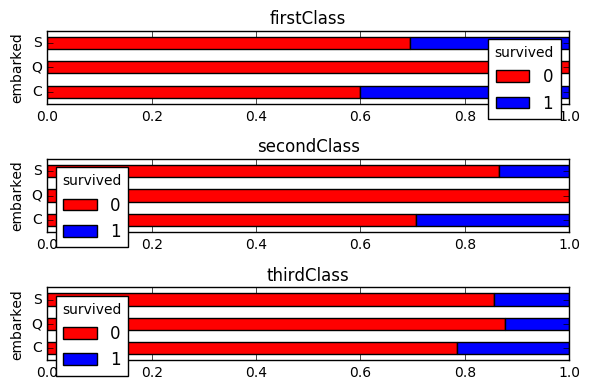

In [7]:
plot_by_sex_and_class(freq_table, 'male', classes)

Here, we can see that males who embarked in Queenstown have the best chances of survival.

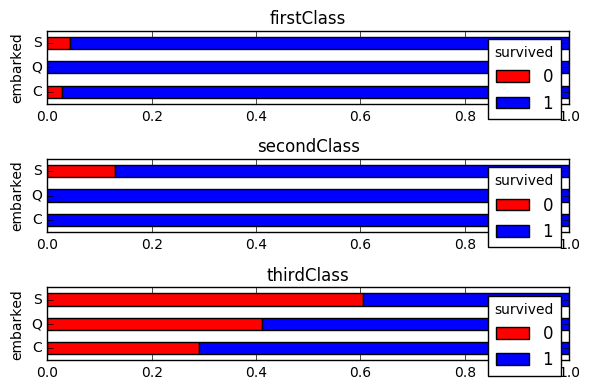

In [8]:
plot_by_sex_and_class(freq_table, 'female', classes)

Here we can see that women that travel in third class have significantly less chances of survival. Also, women who embarked in Southampton and are traveling in any class have the lowest survival rate. 

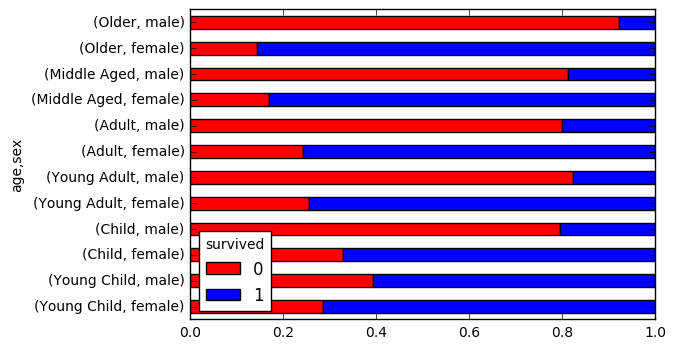

In [9]:
bins = [0,5,18, 25, 40, 60, 100]
binNames =['Young Child', 'Child', 'Young Adult', 'Adult', 'Middle Aged', 'Older']
binAge = pd.cut(df.age, bins, labels=binNames)
binAge

group = df.groupby([binAge, 'sex', 'survived'])
group = group.size().unstack()
group = group.div(group.sum(1), axis=0)
colorsheme = ['red','blue']
ax = group.plot(kind='barh', stacked=True, color=colorsheme)
plt.show()

When we look at the sex and age, we can see that the older the men are, the smaller the chances of survival are. It is vice versa for women. 

## Preprocesing the data
### What is the age/class of persons whose fare is 0? Are they babies/kids?

In [10]:
df[df.fare==0].age.value_counts(dropna=False)

NaN      9
 49.0    2
 25.0    1
 36.0    1
 19.0    1
 38.0    1
 40.0    1
 39.0    1
Name: age, dtype: int64

In [11]:
df[df.fare==0].age.describe()

count     8.000000
mean     36.875000
std      10.494046
min      19.000000
25%      33.250000
50%      38.500000
75%      42.250000
max      49.000000
Name: age, dtype: float64

As they are not kids, lets replace their fare with the mean.

In [12]:
df.fare.describe()
mean = df.fare.describe()['mean']
df.fare = df.fare.apply(lambda x: mean if pd.isnull(x) else x)

In [13]:
# Checking for null values in embarked
df = df[pd.notnull(df['embarked'])]
df.embarked.value_counts(dropna=False)

S    914
C    270
Q    123
Name: embarked, dtype: int64

### Null values in age column

In [14]:
ser = df.age.value_counts(dropna=False)
ser.head()

NaN      263
 24.0     47
 22.0     43
 21.0     41
 30.0     40
Name: age, dtype: int64

In [15]:
mean = df.age.describe()['mean']
df['age1'] = df.age.apply(lambda x: mean if np.isnan(x) else x)

In [16]:
cat_columns = ['pclass', 'sex', 'embarked'] # embarked
for cat_col in cat_columns:
    df = df.join(pd.get_dummies(df[cat_col]))

In [17]:
# for feat in features:
#     print("{}, from {}".format(df[feat].isnull().sum(), feat))

In [18]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,age1,firstClass,secondClass,thirdClass,female,male,C,Q,S
0,1,firstClass,female,29.0000,0,0,211.3375,S,29.0000,1,0,0,1,0,0,0,1
1,1,firstClass,male,0.9167,1,2,151.5500,S,0.9167,1,0,0,0,1,0,0,1
2,0,firstClass,female,2.0000,1,2,151.5500,S,2.0000,1,0,0,1,0,0,0,1
3,0,firstClass,male,30.0000,1,2,151.5500,S,30.0000,1,0,0,0,1,0,0,1
4,0,firstClass,female,25.0000,1,2,151.5500,S,25.0000,1,0,0,1,0,0,0,1


## Task 2: Prediction
### Split test and train

In [19]:
from sklearn.model_selection import train_test_split
from time import time
x_train, x_test, y_train, y_test = train_test_split(df.drop('survived', 1), df['survived'], test_size=0.2, stratify=df['survived'])
x_train['survived']  = y_train
x_test['survived'] = y_test

In [20]:
from sklearn import tree
from sklearn.metrics import accuracy_score
clf = tree.DecisionTreeClassifier(criterion='entropy')
clf_feat = ['age1', 'firstClass', 'secondClass', 'thirdClass', 'sibsp', 'parch', 'fare', 'female', 'C', 'Q', 'S']
clf = clf.fit(x_train[clf_feat], y_train)
clf_preds = clf.predict(x_test[clf_feat])

results = {}
results['init_sk'] = accuracy_score(y_test, clf_preds)
print(results['init_sk'])

0.782442748092


### Cross Validation with scikit

In [21]:
from sklearn.model_selection import cross_val_score
# clf = tree.DecisionTreeClassifier(criterion='entropy')
scores = cross_val_score(clf, df[clf_feat], df['survived'], cv=10)
results['cv_sk'] = np.mean(scores)
print(results['cv_sk'])

0.714529535202


### Parameter Grid search with scikit

In [22]:
from sklearn.model_selection import GridSearchCV
tuned_parameters = [{'max_depth': [5,10,12,14,15,20], 'min_samples_split': [2,3,4],
                     'min_samples_leaf': [5, 6, 8, 10, 15]}]
gs_cv = GridSearchCV(tree.DecisionTreeClassifier(criterion='entropy'), tuned_parameters, cv=10)
gs_cv.fit(df[clf_feat], df['survived'])

best_params = gs_cv.best_params_

print("Best parameters set found on development set:")
print()
print(gs_cv.best_params_)
print()
print("Grid scores on development set:")
print()
means = gs_cv.cv_results_['mean_test_score']

results['pg_cv_sk'] = np.mean(means)
print (results['pg_cv_sk'])

Best parameters set found on development set:

{'min_samples_split': 4, 'max_depth': 10, 'min_samples_leaf': 8}

Grid scores on development set:

0.755036980362


### Apply the best parameters on out test/train split

In [23]:
clf = tree.DecisionTreeClassifier(criterion='entropy', **best_params)
clf = clf.fit(x_train[clf_feat], y_train)
clf_preds = clf.predict(x_test[clf_feat])

results['init_sk_bp'] = accuracy_score(y_test, clf_preds)
print(results['init_sk_bp'])

0.835877862595


### Baseline comparison

In [24]:
df.survived.value_counts(normalize=True)

0    0.618975
1    0.381025
Name: survived, dtype: float64

In [25]:
# Export graph
tree.export_graphviz(clf, out_file='tree.dot')

In [26]:
# Feature importance discussion

## Task 3: Implement your own Decision Tree Classifier

In [27]:
from sklearn.metrics import accuracy_score
def split_dataset(dataset, column, value):
    if isinstance(value,int) or isinstance(value,float):
        df1 = dataset[dataset[column]>=value]
        df2 = dataset[dataset[column]< value]
    else:
        df1 = dataset[dataset[column]== value]
        df2 = dataset[dataset[column]!= value]
    return (df1,df2)

In [28]:
def unique_counts(dataset, class_column="survived"):
    return dataset[class_column].value_counts().to_dict()

In [29]:
def gini_impurity(dataset):
    total=len(dataset)
    counts=unique_counts(dataset)
    imp=0
    for k1 in counts:
        p1=float(counts[k1])/total
        for k2 in counts:
            if k1==k2: continue
            p2=float(counts[k2])/total
            imp+=p1*p2
    return imp


from math import log
def entropy(dataset):
    log2 = lambda x: log(x)/log(2)
    results = unique_counts(dataset)
    ent = 0.0
    for k,v in results.items():
        p = float(v)/len(dataset)
        ent = ent - p*log2(p)
    return ent

In [30]:
class tree_node:
    def __init__(self,col=-1,value=None,leftn=None, rightn=None, leaf=None):
        self.col=col
        self.value=value
        self.leftn=leftn
        self.rightn=rightn
        self.leaf=leaf

In [31]:
class DecisionTree:
    def __init__(self, tree=None):
        self.tree = tree
    def fit(self, features, target, score_f=entropy):
        label = target.name
        features[label] = target.values
        self.tree = self.build_tree(features, label, score_f)
    def predict(self, features):
        predictions = []
        for row in range(0,len(features)):
            predictions.append(self.classify(features.iloc[row], self.tree))
        return predictions
    def classify(self, features, tree):
        if tree.leaf != None:
            return list(tree.leaf.keys())[0]
        else:
            v = features[tree.col]
            branch = None
            if isinstance(v,int) or isinstance(v,float):
                if v>= tree.value:
                    branch = tree.leftn
                else:
                    branch = tree.rightn
            else:
                if v==tree.value:
                    branch = tree.leftn
                else:
                    branch = tree.rightn 
            return self.classify(features, branch)
    def build_tree(self, dataset,label="survived",score_f=entropy):
        if len(dataset) == 0:
            return tree_node()
        current_score = score_f(dataset)

        best_gain = 0.0
        best_col_val = None
        best_dfs = None

        columns = list(dataset.columns)
        columns.remove(label)
        for col in columns:
            unique_vals = list(dataset[col].unique())
            for val in unique_vals:
                (df1,df2) = split_dataset(dataset, col, val)
                p = float(len(df1)/len(dataset))
                infg = current_score - p*score_f(df1) - (1-p)*score_f(df2)
                if infg > best_gain and len(df1)>0 and len(df2)>0:
#                     print("GAIN: {}, COL: {}, VAL: {}".format(infg,col,val))
                    best_gain = infg
                    best_col_val = (col,val)
                    best_dfs = (df1,df2)
        if best_gain>0:
            leftn = self.build_tree(best_dfs[0])
            rightn = self.build_tree(best_dfs[1])
            return tree_node(best_col_val[0], best_col_val[1], leftn, rightn)
        else:
            return tree_node(leaf=unique_counts(dataset))
    def score(x, y):
        return accuracy_score(self.predict(x), y)


### Using our classifier

In [32]:
features = ['sex', 'age1', 'pclass', 'fare', 'embarked', 'sibsp', 'parch']

In [33]:
dt = DecisionTree()
dt.fit(x_train[features], y_train)
predictions = dt.predict(x_test[features])

results['init_our'] = accuracy_score(y_test, predictions)
print(results['init_our'])

0.774809160305


### Cross validation

In [34]:
from sklearn.model_selection import KFold
def cross_val(classifier, data, target, num_iter):
    accus = []
    label = target.name
    data[label] = target.values
    frac = 1 / float(num_iter)
    for i in range(0, num_iter):
        from_ix = i*frac
        to_ix = from_ix + frac
        split_ix = data.index[int(len(data)*from_ix):int(len(data)*to_ix)]
        train = data.drop(split_ix)
        test=data.drop(train.index)
        classifier.fit(train.drop(label, 1), train[label])
        predictions = classifier.predict(test.drop(label, 1))
        acc = accuracy_score(test[label], predictions)
        accus.append(acc)
    return accus

In [35]:
cv_scores = cross_val(DecisionTree(), df[features], df['survived'], 10)

results['cv_our'] = np.mean(cv_scores)
print(results['cv_our'])

0.726881972989


### Print decision rules

In [36]:
def printtree(tree, indent=''):

    # Is this a leaf node?
    if tree.leaf!=None:
        print(str(tree.leaf))
    else:
        print(str(tree.col)+':'+str(tree.value)+'? ')
        # Print the branches
        print(indent+'T->', end=" ")
        printtree(tree.leftn,indent+'  ')
        print(indent+'F->', end=" ")
        printtree(tree.rightn,indent+'  ')


In [37]:
printtree(dt.tree)

sex:female? 
T-> pclass:thirdClass? 
  T-> fare:23.45? 
    T-> fare:34.375? 
      T-> {0: 9}
      F-> fare:31.3875? 
        T-> {1: 2}
        F-> parch:0? 
          T-> {1: 1}
          F-> {0: 14}
    F-> fare:7.2833? 
      T-> age1:2.0? 
        T-> fare:22.025? 
          T-> {1: 6}
          F-> age1:37.0? 
            T-> sibsp:1? 
              T-> age1:45.0? 
                T-> age1:47.0? 
                  T-> {0: 1}
                  F-> {1: 1}
                F-> {0: 1}
              F-> {0: 6}
            F-> fare:21.075? 
              T-> {0: 2}
              F-> fare:20.25? 
                T-> {1: 2}
                F-> fare:8.1125? 
                  T-> fare:8.6833? 
                    T-> sibsp:1? 
                      T-> fare:17.8? 
                        T-> {0: 3}
                        F-> fare:16.7? 
                          T-> {1: 2}
                          F-> age1:15.0? 
                            T-> age1:26.0? 
                             

## Improving our classifier
### Bagging

In [38]:
def generate_trees(train, features, label, m=9):
    dt_list = []
    for i in range(0,m):
        sample = train.sample(len(train), replace=True)
        dt = DecisionTree()
        dt.fit(sample[features], sample[label])
        dt_list.append(dt)
    return dt_list




from collections import Counter
def bagging(train, test, features, label, dt_list):
    predictions = []
    df = pd.DataFrame()
    # Iterate over decision trees
    for i in range(0, len(dt_list)):
        dt = dt_list[i]
        df[i] = pd.Series(dt.predict(test))
    for row in df.iterrows():
        c = Counter([pred for pred in row[1]])
        predictions.append(c.most_common()[0][0])
        # print("Iter {}, Pred: {}", i, predictions)
    return predictions


In [39]:
trees = generate_trees(x_train, features, 'survived', m=9)
preds = bagging(x_train, x_test, features, 'survived', trees)

results['bagg_our'] = accuracy_score(y_test, preds)
print(results['bagg_our'])

0.790076335878


### Random forests

In [40]:
import random
def generate_simple_trees(train, features, label, m=9, num_feats=3):
    dt_list = []
    for i in range(0,m):
        sample = train.sample(len(train), replace=True)
        random.shuffle(features)
        features[0:num_feats]
        dt = DecisionTree()
        dt.fit(sample[features], sample[label])
        dt_list.append(dt)
    return dt_list

In [41]:
trees = generate_simple_trees(x_train, features, 'survived', m=15)
preds = bagging(x_train, x_test, features, 'survived', trees)


results['randf_our'] = accuracy_score(y_test, preds)
print(results['randf_our'])

0.812977099237


In [43]:
results

{'bagg_our': 0.79007633587786263,
 'cv_our': 0.72688197298884316,
 'cv_sk': 0.71452953520235618,
 'init_our': 0.77480916030534353,
 'init_sk': 0.78244274809160308,
 'init_sk_bp': 0.83587786259541985,
 'pg_cv_sk': 0.75503698036215228,
 'randf_our': 0.81297709923664119}

### Comparing to SK

In terms of classifier performance, as it could be seen from the dictionary results:

The initial accuracy of our classifier was 0.77480916030534353 and the initial accuracy of the sklearn implementation was 0.78244274809160308. 

After performing cross validation, the mean accuracy of our classifier was 0.72688197298884316 and it was 0.71452953520235618 for the sklearn implementation.

We implemented bagging for our classifier, which improved the accuracy up to 0.79007633587786263. Additionaly, we implemented random forests. Using this method improved the classifier performance up to 0.81297709923664119.

However, after using Grid Search and determening the best hyperparameters the SK classifier performed much better with an accuracy of 0.83587786259541985. 

